## Midterm Review

- Takehome midterm from Monday March 8 - Thursday March 11
- Based on lectures 1-9 and the corresponding readings / hws
- https://ambujtewari.github.io/stats306-winter2021/

# Covariation

- Scary word, but basically just looking for patterns between two variables
- Breaks down into cases:
- Continuous vs. Continuous (Scatterplot)
- Continuous vs. Discrete (Boxplots, violin plots, freq poly, etc)
- Discrete vs. Discrete (Geom Count)

# Exercise Setup

In [1]:
install.packages("dslabs")

package 'dslabs' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\polan\AppData\Local\Temp\RtmpKmx3pD\downloaded_packages


In [2]:
library(dslabs)
library(tidyverse)

Warning message:
"package 'dslabs' was built under R version 3.6.3"Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v ggplot2 3.1.1       v purrr   0.3.2  
v tibble  2.1.1       v dplyr   0.8.0.1
v tidyr   0.8.3       v stringr 1.4.0  
v readr   1.3.1       v forcats 0.4.0  
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()


# Looking at our data

In [3]:
gapminder  %>% glimpse
summary(gapminder)

Observations: 10,545
Variables: 9
$ country          <fct> Albania, Algeria, Angola, Antigua and Barbuda, Arg...
$ year             <int> 1960, 1960, 1960, 1960, 1960, 1960, 1960, 1960, 19...
$ infant_mortality <dbl> 115.40, 148.20, 208.00, NA, 59.87, NA, NA, 20.30, ...
$ life_expectancy  <dbl> 62.87, 47.50, 35.98, 62.97, 65.39, 66.86, 65.66, 7...
$ fertility        <dbl> 6.19, 7.65, 7.32, 4.43, 3.11, 4.55, 4.82, 3.45, 2....
$ population       <dbl> 1636054, 11124892, 5270844, 54681, 20619075, 18673...
$ gdp              <dbl> NA, 13828152297, NA, NA, 108322326649, NA, NA, 966...
$ continent        <fct> Europe, Africa, Africa, Americas, Americas, Asia, ...
$ region           <fct> Southern Europe, Northern Africa, Middle Africa, C...


                country           year      infant_mortality life_expectancy
 Albania            :   57   Min.   :1960   Min.   :  1.50   Min.   :13.20  
 Algeria            :   57   1st Qu.:1974   1st Qu.: 16.00   1st Qu.:57.50  
 Angola             :   57   Median :1988   Median : 41.50   Median :67.54  
 Antigua and Barbuda:   57   Mean   :1988   Mean   : 55.31   Mean   :64.81  
 Argentina          :   57   3rd Qu.:2002   3rd Qu.: 85.10   3rd Qu.:73.00  
 Armenia            :   57   Max.   :2016   Max.   :276.90   Max.   :83.90  
 (Other)            :10203                  NA's   :1453                    
   fertility       population             gdp               continent   
 Min.   :0.840   Min.   :3.124e+04   Min.   :4.040e+07   Africa  :2907  
 1st Qu.:2.200   1st Qu.:1.333e+06   1st Qu.:1.846e+09   Americas:2052  
 Median :3.750   Median :5.009e+06   Median :7.794e+09   Asia    :2679  
 Mean   :4.084   Mean   :2.701e+07   Mean   :1.480e+11   Europe  :2223  
 3rd Qu.:6.000   3r

### 1) How many entries have NA for GDP? Filter and create a new dataset df that has no missing gdp data

In [4]:
gapminder$gdp  %>% is.na()  %>% sum()

[1] 2972

In [5]:
df = gapminder  %>% filter(!is.na(gdp))

### 2) Note that GDP is in dollars. This is hard to work with, so convert to billion dollars instead

In [6]:
df = df  %>% mutate(gdp = gdp / 1e9)

### 3) Save the countries that have data in 2011 as df2011

In [7]:
df2011 = df  %>%  filter(year == 2011)

In [8]:
nrow(df2011)

[1] 168

In [9]:
nrow(df)

[1] 7573

### 4) Which countries have data in both 1960 and 2011?

In [10]:
countries1960 <- df  %>%  filter(year == 1960)  %>% select(country)  %>%  deframe

In [11]:
df2011  %>% filter(country %in% countries1960)  %>%  select(country) %>% deframe

[1] Algeria                        Argentina                     
 [3] Australia                      Austria                       
 [5] Bahamas                        Bangladesh                    
 [7] Belgium                        Belize                        
 [9] Benin                          Bolivia                       
[11] Botswana                       Brazil                        
[13] Burkina Faso                   Burundi                       
[15] Cameroon                       Canada                        
[17] Central African Republic       Chad                          
[19] Chile                          China                         
[21] Colombia                       Congo, Dem. Rep.              
[23] Congo, Rep.                    Costa Rica                    
[25] Cote d'Ivoire                  Denmark                       
[27] Dominican Republic             Ecuador                       
[29] Egypt                          El Salvador                   
[31] Fiji                           Finland                       
[33] France                         Gabon                         
[35] Ghana                          Greece                        
[37] Guatemala                      Honduras                      
[39] Hungary                        Iceland                       
[41] India                          Indonesia                     
[43] Israel                         Italy                         
[45] Japan                          Kenya                         
[47] South Korea                    Lesotho                       
[49] Liberia                        Luxembourg                    
[51] Madagascar                     Malawi                        
[53] Malaysia                       Mauritania                    
[55] Mexico                         Morocco                       
[57] Nepal                          Netherlands                   
[59] Nicaragua                      Niger                         
[61] Nigeria                        Norway                        
[63] Oman                           Pakistan                      
[65] Panama                         Papua New Guinea              
[67] Paraguay                       Peru                          
[69] Philippines                    Portugal                      
[71] Rwanda                         St. Vincent and the Grenadines
[73] Senegal                        Seychelles                    
[75] Sierra Leone                   Singapore                     
[77] South Africa                   Spain                         
[79] Sri Lanka                      Sudan                         
[81] Sweden                         Thailand                      
[83] Togo                           Trinidad and Tobago           
[85] Turkey                         United Kingdom                
[87] United States                  Uruguay                       
[89] Venezuela                      Zambia                        
[91] Zimbabwe                      
185 Levels: Albania Algeria Angola Antigua and Barbuda Argentina ... Zimbabwe

### 5) Using df2011, create a gdp box plot for each region

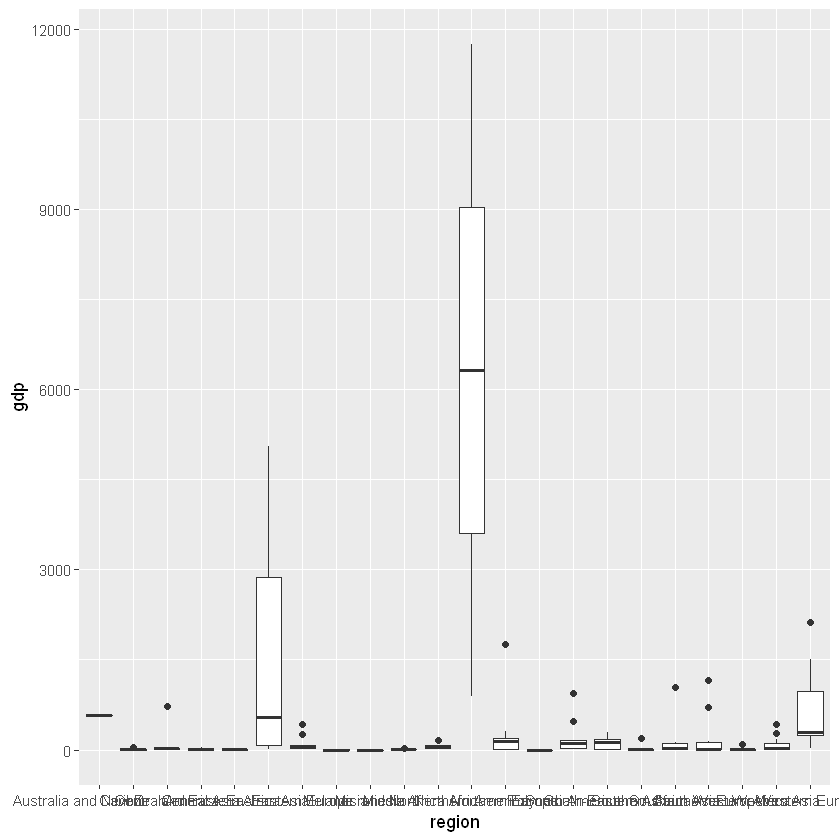

In [14]:
df2011  %>% 
    ggplot(aes(x = region, y = gdp)) +
    geom_boxplot()

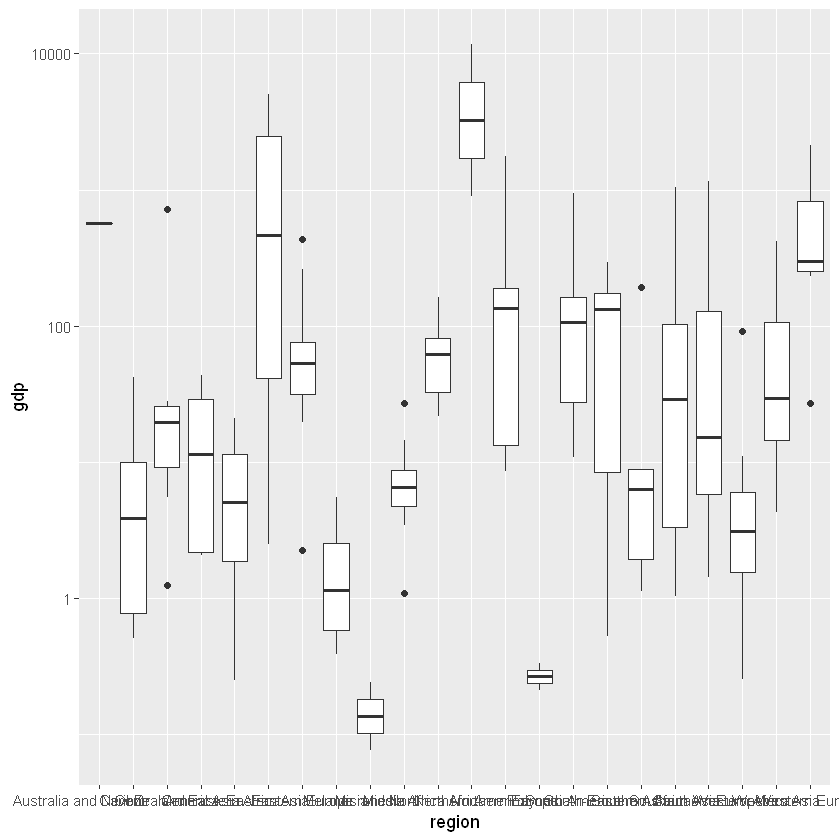

In [15]:
df2011  %>% 
    ggplot(aes(x = region, y = gdp)) +
    geom_boxplot() +
    scale_y_log10()

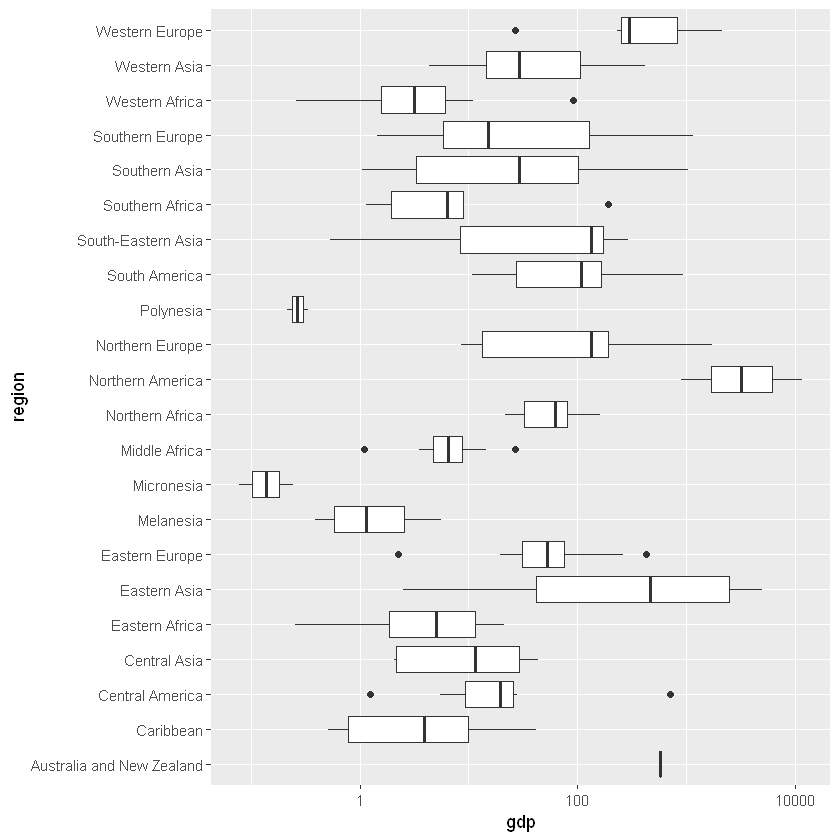

In [16]:
df2011  %>% 
    ggplot(aes(x = region, y = gdp)) +
    geom_boxplot() +
    scale_y_log10() + 
    coord_flip()

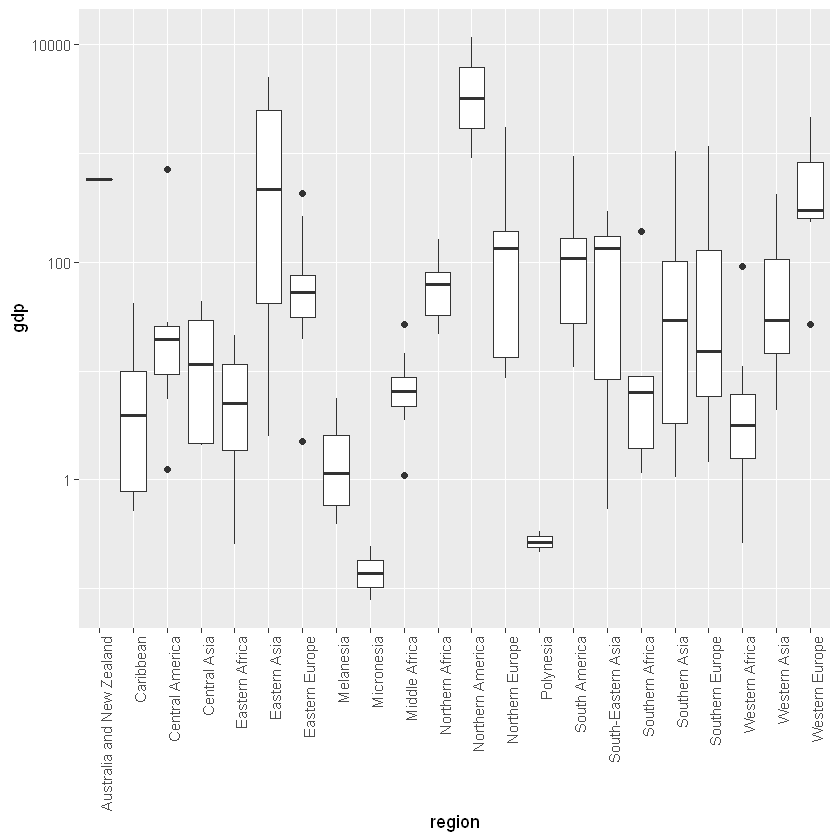

In [19]:
df2011  %>% 
    ggplot(aes(x = region, y = gdp)) +
    geom_boxplot() +
    scale_y_log10() + 
    theme(axis.text.x = element_text(angle = 90, hjust = 1))

### 6) Using df2011, find the maximum and minimum gdp in each region

In [25]:
df2011  %>% 
    group_by(region) %>% 
    summarise(min_gdp = min(gdp), max_gdp = max(gdp)) 
     

region,min_gdp,max_gdp
Australia and New Zealand,573.45398217,5.734540e+02
Caribbean,0.50986673,4.199806e+01
Central America,1.24595697,7.197424e+02
Central Asia,2.06071523,4.354728e+01
Eastern Africa,0.25273737,2.122808e+01
Eastern Asia,2.49791871,5.058762e+03
Eastern Europe,2.26158771,4.331921e+02
Melanesia,0.38648318,5.563353e+00
Micronesia,0.07739471,2.415812e-01
Middle Africa,1.08679980,2.701394e+01


### 7) Using df2011, find the world median and mean. Then for each region, calculate the percentage of companies whose mean and median GDP exceed the world median and mean. Arrange in descending order by median, then by mean. 

In [28]:
world_mean <- mean(df2011$gdp)
world_med <- median(df2011$gdp)

In [35]:
df2011  %>%
    group_by(region) %>% 
    summarise(perc_mean = mean(gdp > world_mean), perc_median = mean(gdp > world_med))  %>% 
    arrange(desc(perc_median), desc(perc_mean))

region,perc_mean,perc_median
Australia and New Zealand,1.0000000,1.0000000
Northern America,1.0000000,1.0000000
Western Europe,0.7142857,1.0000000
Northern Africa,0.0000000,1.0000000
Eastern Europe,0.2000000,0.9000000
Eastern Asia,0.6666667,0.8333333
South America,0.2000000,0.8000000
Northern Europe,0.2000000,0.7000000
Western Asia,0.1333333,0.6666667
South-Eastern Asia,0.1111111,0.6666667


### 8) Using df2011, create a new column called gdp per capita. (GDP / Population). Decide on a plot that appropriately shows the relationship between GDP and GDP Per Capita. Consider using log scales. Then create a subplot for each continent. 

In [37]:
df2011 = df2011 %>% mutate(gdp_pc = 1e9*gdp/population)

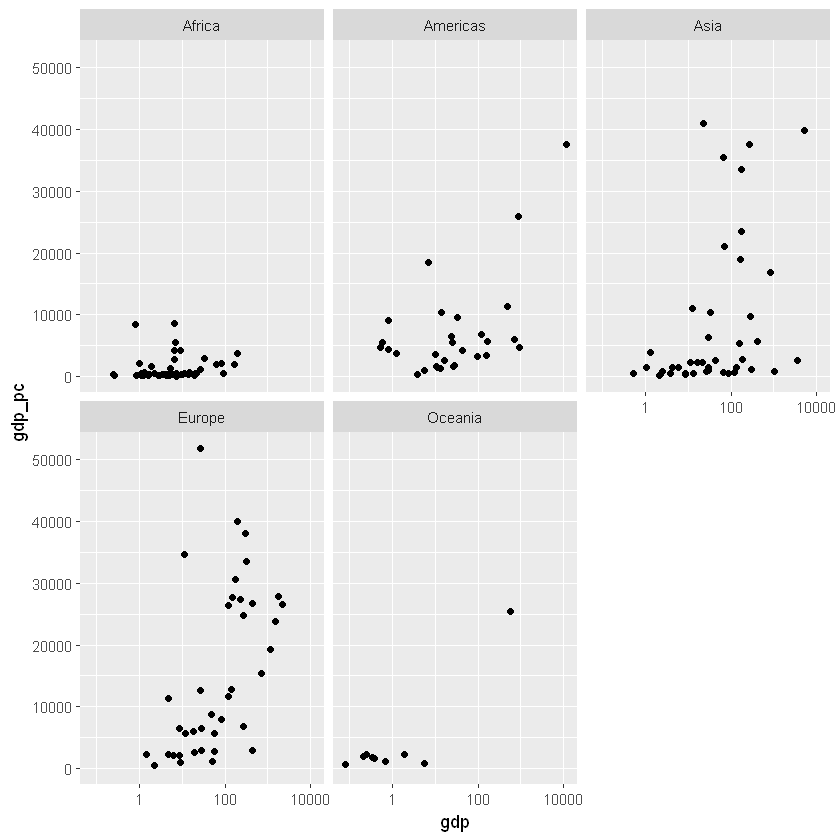

In [46]:
df2011  %>% 
    ggplot(aes(x = gdp, y = gdp_pc)) +
    geom_point() +
    scale_x_log10() +
    facet_wrap(~continent)